# EE 473 Final Project Report
## BrainWorld: Deep Q-Learning for Brain Tumor Localization on MRI scans
### Lawrence Chillrud <chili@u.northwestern.edu>
### 06/08/23

## Background
Glioblastoma (GBM) is the most common and aggressive form of malignant brain cancer in adults, with GBM patients suffering extremely poor prognoses. GBM patients receiving standard of care treatment (routinely involving chemotherapy) have a median survival of approximately 14 months from initial [diagnosis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5563115/). An important early step in the
treatment of GBM is localization of the brain tumor on MRI imaging volumes. Encouragingly, deep reinforcement learning (RL) has shown promise in landmark or lesion localization in various medical imaging [applications](https://aapm.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/acm2.13898). 

In this project, I investigate the ability of Deep Q-learning and [Deep Q-Networks (DQNs)](https://arxiv.org/pdf/1312.5602.pdf) in localizing brain tumor lesions on multi-parametric MRI (mpMRI) scans. I use the popular [BraTS 2021 dataset](https://arxiv.org/pdf/2107.02314.pdf) – comprising hundreds of MRI scans of GBM expertly annotated with tumor segmentation masks–to train, validate, and test my DQN model. I base my approach largely off [Stember and Shalu](https://link.springer.com/article/10.1186/s12880-022-00919-x), who apply a simplistic gridworld framework to 2D image slices containing tumor from 3D MRI image volumes, and employ standard TD(0) Q-learning along with a
DQN to navigate the gridworld environment. Stember and Shalu divide each $240\times240$ pixel slice into a grid made up of $60\times60$ tiles, in which the agent begins in the uppermost top left tile, and chooses among a set of actions $\mathcal{A} = \{\texttt{stay still, move down, move right}\}$. The agent is given rewards according to equation (1).
\begin{equation}
R_t = \begin{cases}
        -2, & \text{if agent is outside lesion and stays still} \\
        +1, & \text{if agent overlaps lesion and stays still} \\
        -0.5, & \text{if agent moves to position outside lesion} \\
        +1, & \text{if agent moves to position overlapping lesion}
    \end{cases}
\end{equation}

## Project set up
### The Github project repository
In my project, I make use of many `.py` python scripts to stay organized and keep the code clean, readable, and reproducible. This jupyter notebook requires these scripts in order to run, therefore I have set up [a Github repository](https://github.com/lawrence-chillrud/brainworld) containing the many `.py` scripts placed in their appropriate directory structure. You can clone the repository with:
```
git clone https://github.com/lawrence-chillrud/brainworld.git
```
In the repository, you will find all source code (including this jupyter notebook) in the `src/` directory. The most important files are:
* `agent.py`: Containing a custom DQN agent written for this project.
* `brainworld.py`: Containing a custom Brain World environment built on top of `gym`'s `Env` class, treating a 2D MRI slice as a gridworld environment for the DQN agent to navigate.
* `models.py`: Containing the neural network architectures used to learn the Q-values from the data.

There are also numerous helper functions located in the `utils` module that will be used throughout the analysis, mostly relating to visualization / plotting functions, or data wrangling and preprocessing.

### Software package dependencies
I have set up a `brainworld_env.yml` file in the top level of the Github repository (see it [here](https://github.com/lawrence-chillrud/brainworld/blob/main/brainworld_env.yml)) so that others can reproduce the exact miniconda environment used. You can create and then activate the `brainworld` miniconda environment with:
```
conda env create --file brainworld_env.yml
conda activate brainworld
```

The most important dependecies are listed below for your convenience:
* `python==3.8.16`
* `tensorflow==2.9.1` (for implementing deep learning models for the DQN)
* `keras==2.9.0` (for implementing deep learning models for the DQN)
* `nvidia-cublas-cu11==11.11.3.6` (for GPU processing)
* `nvidia-cudnn-cu11==8.6.0.163` (for GPU processing)
* `gym==0.26.2` (for implementing the BrainWorld RL environment)
* `pygame==2.4.0` (for implementing the BrainWorld RL environment)
* `nibabel==5.1.0` (for reading the BraTS 2021 MRI scans saved as `.nii.gz` data files)
* `numpy==1.24.3` (for data processing and wrangling)
* `pandas==2.0.2` (for data processing and wrangling)
* `matplotlib==3.7.1` (for plotting and visualization)

### Downloading the dataset
This project utilizes the Task 1 dataset from the 2021 BraTS challenge. The data can be found and [downloaded here](https://www.synapse.org/#!Synapse:syn27046444/wiki/616992). Once downloaded, the files are organized into a `data/` directory. This `data/` dir is ignored by the `.gitignore` file of the Github repo, to avoid pushing 13GB of data and blowing up the `.git` folder. To see how the full brainworld directory is set up on my Zeus account, you can run the following cell below which should give you a decent idea. Otherwise, refer to this graphical representation:
```
📦 brainworld
 ┣ 📂 .git
 ┣ 📂 data
 ┃ ┣ 📂 train
 ┃ ┃ ┣ 📂 BraTS2021_00000
 ┃ ┃ ┃ ┣ 📜 BraTS2021_00000_flair.nii.gz
 ┃ ┃ ┃ ┣ 📜 BraTS2021_00000_seg.nii.gz
 ┃ ┃ ┃ ┣ 📜 BraTS2021_00000_t1.nii.gz
 ┃ ┃ ┃ ┣ 📜 BraTS2021_00000_t1ce.nii.gz
 ┃ ┃ ┃ ┗ 📜 BraTS2021_00000_t2.nii.gz
 ┃ ┃ ┣ 📂 ...
 ┃ ┃ ┗ 📂 BraTS2021_01666
 ┃ ┃ ┃ ┣ 📜 BraTS2021_01666_flair.nii.gz
 ┃ ┃ ┃ ┣ 📜 BraTS2021_01666_seg.nii.gz
 ┃ ┃ ┃ ┣ 📜 BraTS2021_01666_t1.nii.gz
 ┃ ┃ ┃ ┣ 📜 BraTS2021_01666_t1ce.nii.gz
 ┃ ┃ ┃ ┗ 📜 BraTS2021_01666_t2.nii.gz
 ┃ ┗ 📜 train_labels.csv
 ┣ 📂 output
 ┃ ┣ 📂 figures
 ┣ 📂 src
 ┃ ┣ 📂 utils
 ┃ ┃ ┣ 📜 __init__.py
 ┃ ┃ ┣ 📜 patchify.py
 ┃ ┃ ┣ 📜 reader.py
 ┃ ┃ ┗ 📜 visualize.py
 ┃ ┣ 📜 agent.py
 ┃ ┣ 📜 brainworld-final-report.ipynb
 ┃ ┣ 📜 brainworld.py
 ┃ ┣ 📜 experiments.py
 ┃ ┗ 📜 models.py
 ┣ 📜 .gitignore
 ┣ 📜 README.md
 ┗ 📜 brainworld_env.yml
 ```

In [1]:
!echo "The top level of the /brainworld/ repo:"
!ls -al ..
!echo "Looking inside the /data/ directory:"
!ls -al ../data
!echo "The first five subdirectories of the /data/train/ dir:"
!ls ../data/train | head -5
!echo "Checking out one of the BraTS 2021 training directories:"
!ls ../data/train/BraTS2021_00000

The top level of the /brainworld/ repo:
total 20
drwxrwxr-x.  6 lawrence lawrence  183 Jun  6 13:36 .
drwxr-x---. 23 lawrence lawrence 4096 May 30 20:44 ..
-rw-rw-r--.  1 lawrence lawrence 2458 Jun  6 11:46 brainworld_env.yml
drwx------.  3 lawrence lawrence   55 May 30 17:23 data
-rw-rw-r--.  1 lawrence lawrence 1064 Jun  6 13:36 directory_structure.txt
drwxrwxr-x.  8 lawrence lawrence  237 Jun  6 16:05 .git
-rw-rw-r--.  1 lawrence lawrence 3131 May 30 20:48 .gitignore
drwxrwxr-x.  4 lawrence lawrence   79 Jun  6 14:51 output
-rw-rw-r--.  1 lawrence lawrence   99 May 30 17:19 README.md
drwxrwxr-x.  4 lawrence lawrence  205 Jun  6 10:42 src
Looking inside the /data/ directory:
total 72
drwx------.    3 lawrence lawrence    55 May 30 17:23 .
drwxrwxr-x.    6 lawrence lawrence   183 Jun  6 13:36 ..
drwx------. 1253 lawrence lawrence 40960 May 30 17:26 train
-rw-------.    1 lawrence lawrence  4701 May 30 17:23 train_labels.csv
The first five subdirectories of the /data/train/ dir:
BraTS2

## Visualizing the BraTS 2021 Data
Before diving into the RL code, let's familiarize ourselves with the BraTS 2021 data by visualizing it in a few different ways. The BraTS 2021 data contains multi-parametric MRI (mpMRI) scans of the brain of patients with glioblastoma (GBM). In the Task 1 dataset, we are given `.nii.gz` files of the following modalities: 
* T1-weighted
* T2-weighted
* T1-weighted contrast enhanced (T1ce)
* Fluid-attenuated inversion recovery (FLAIR)
* The segmentation mask created by expert annotators

Each of these modalities allows for the analysis of different structures within the brain. For example, [FLAIR](https://pubmed.ncbi.nlm.nih.gov/9402679/#:~:text=Fluid%2Dattenuated%20inversion%20recovery%20(FLAIR)%20is%20a%20magnetic%20resonance,gray%20matter%20and%20white%20matter.) is an MRI sequence that produces "strong T2 weighting, suppresses the CSF [cerebro-spinal fluid] signal, and minimizes contrast between gray matter and white matter." These are all 3D volumetric scans, and for all patients in the dataset and all modalities, the scans have been coregistered to be a uniform $240\times240\times155\times1$ pixels (Length x Width x Height x Channels). Let's take a look at one patient's mpMRI scans, viewing just a single slice. We will pick a slice with a large tumor content (chosen heuristically by consulting the segmentation mask). Let's check out patient ID #2. From left to right, the columns give a view of the scan, the segmentation mask, and the segmentation overlaid on top of the original scan. From top to bottom, the rows let us look at the different modalities. The function `visualize_scan` from my `utils` module crops the images so we can focus on the brain. The slice number is chosen along the $z$-axis, where the scans have shape $(x, y, z, c)$ (Length x Width x Height x Channels).

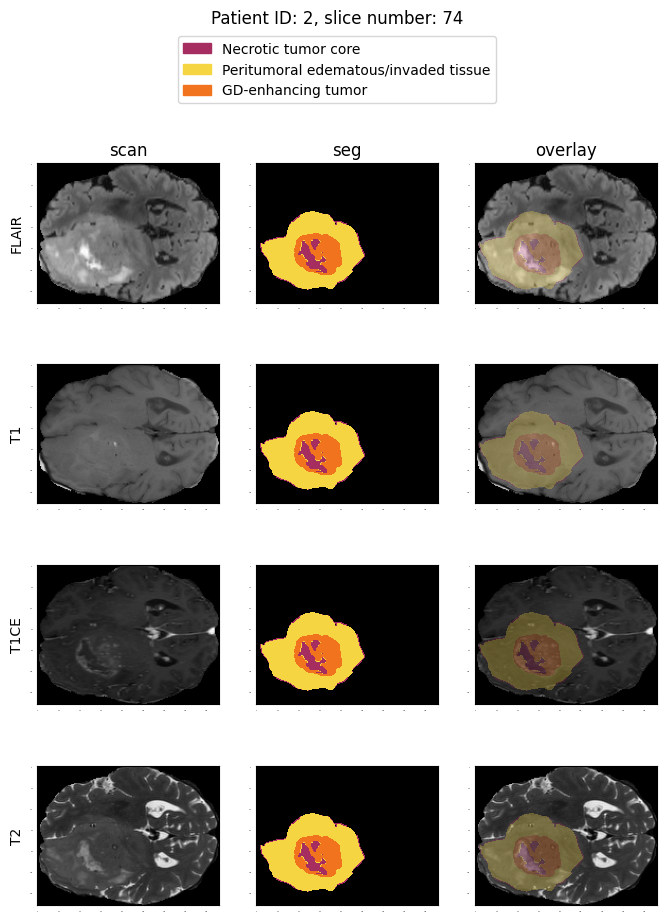

In [2]:
from utils import visualize_scan
visualize_scan(2)

Let's check out one more, looking at patient ID #5:

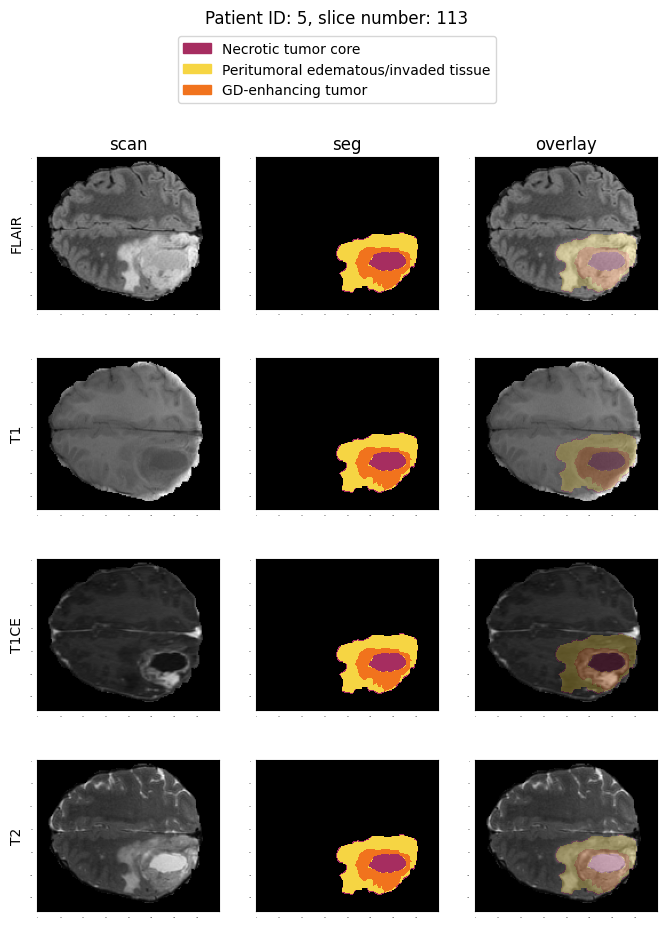

In [3]:
visualize_scan(5)

We can also look at one of these scans in a little more detail, slice by slice. Let's do that now by looking at patient ID #5's T1ce scan. For now, let's stick with the T1ce scan since this is what Stember and Shalu use for their experiments. We can iterate through all the slices along the $z$-axis to get an idea of what the whole 3D volume looks like using the `animate_scan` function from my `utils` module:

MovieWriter ffmpeg unavailable; using Pillow instead.


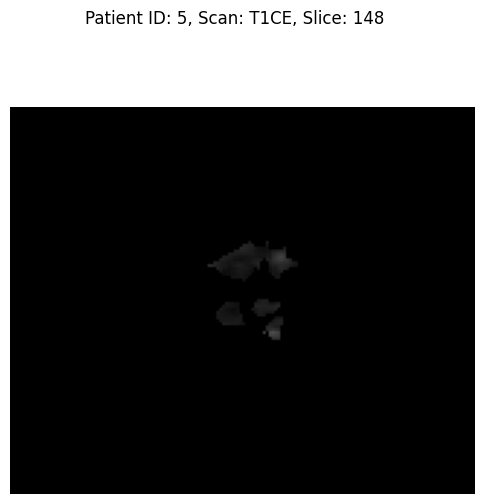

In [4]:
from utils import animate_scan
animate_scan(5, modality='t1ce')

<img src="../output/gifs/patient5_t1ce.gif" width="450" align="center">

*Note: if you cannot see this GIF the way you are viewing this notebook (VS Code gives best results), then please checkout [/brainworld/output/gifs/patient5_t1ce.gif](https://github.com/lawrence-chillrud/brainworld/blob/main/output/gifs/patient5_t1ce.gif).*

## The state space: constructing the grid

Ok, looking good! Now that we've gotten a sense of what the MRIs we're working with are like, let's start thinking about our BrainWorld environment. We want to build a gridworld setting on top of our MRI scan by patchifying the MRI into a $n \times n$ grid of patches. Since our scans are of size $240\times240\times155\times1$, we will follow Stember and Shalu's lead and make a simplistic $4 \times 4$ grid, dividing a $240 \times 240$ slice into patches of size $60 \times 60$. For each patient, we could pick any slice, but since this is a localization task, we want a slice that has some tumor content. To keep things simplistic, let's continue to use our basic heuristic of picking the slice of the patient that has the biggest tumor content, as measured by taking the sum of the tumor mask (see the `find_tumorous_slice` function from the `visualize.py` file in the `utils` module). We can then plot our patchified BrainWorld grid for a single patient using the `plot_brainworld` function from the `utils` module. Again, following Stember and Shalu's tack, we will use the T1ce scan. Let checkout patient ID #5 again. We'll make two plots, the first showing the gridworld environment that our agent will have to navigate, using the T1ce scan. This gridworld of MRI patches makes up the state space, $\mathcal{S}$. We can see that using a $4\times4$ grid leaves us with an environment with 16 different states. The job of our DQN will be to predict the Q-values of each action $a_t \in \mathcal{A}$ when in each state $s_t \in \mathcal{S}$ (a patch of the MRI scan). The second plot we make will show the underlying labels of the scan from the segmentation mask – this is how we will calculate the rewards the environment gives back to the agent during training, which we cover in the next section. *(Note: the colour scheme in these plots will be slightly off, since each patch has it's own max and min pixel values, but the plots still get the idea across well, I think.)*

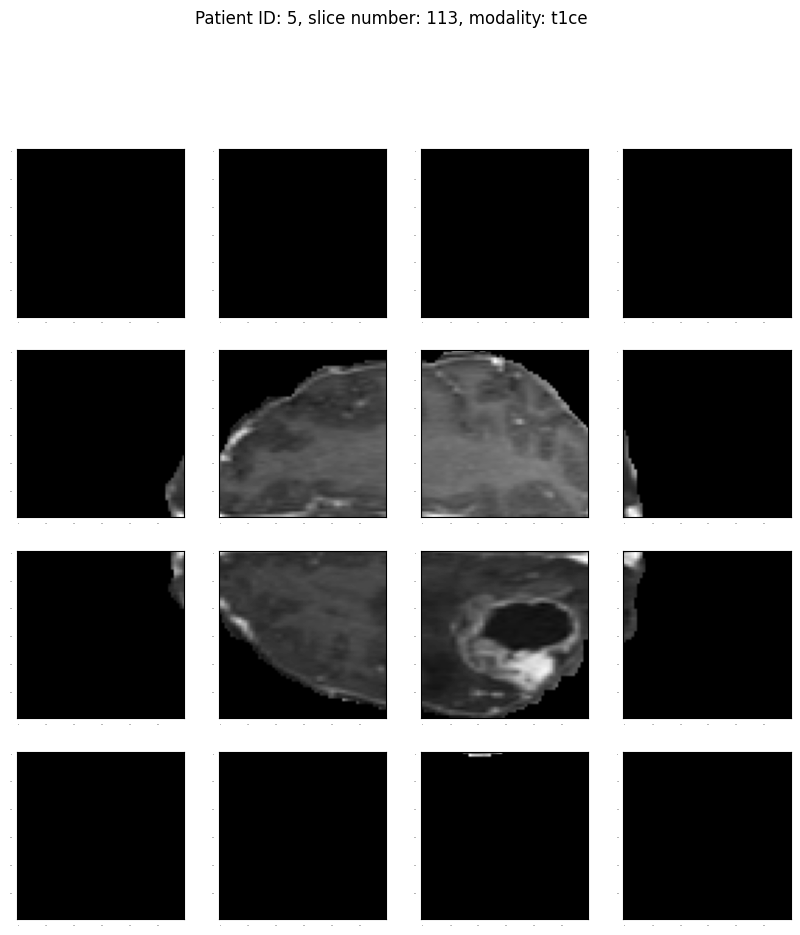

In [5]:
from utils import plot_brainworld
plot_brainworld(5, modality='t1ce')

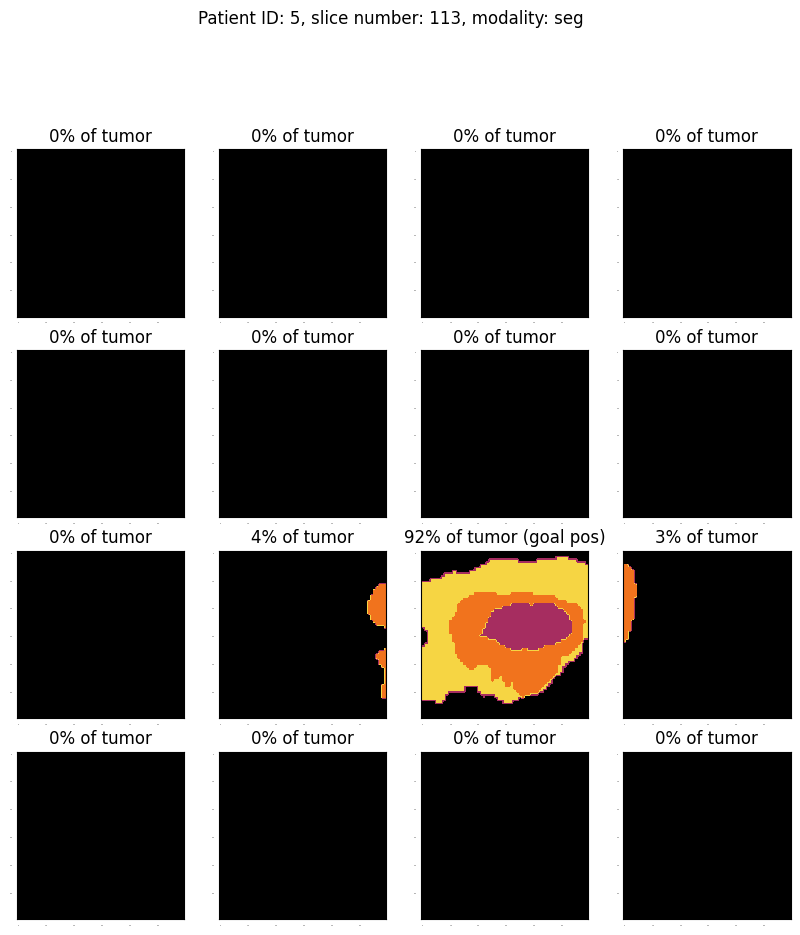

In [6]:
plot_brainworld(5)

In our state space, the agent will always begin in the upper-left-most corner of the BrainWorld grid. In slightly more formal terms, the initial state that the agent starts off in, denoted $s_0$, will always be at position `(0, 0)`. The bottom-right-most corner of the BrainWorld grid will be encoded as position `(3, 3)`. The first number of the positional encoding denotes which row of the grid the agent occupies, while the second denotes the column. For example, in the above plot, the tag `goal pos`, identifying the patch with 92% of the tumor content, is located at position `(2, 2)`. The patch with "4% of the tumor content" is at position `(2, 1)`. See the next section for a more thorough explanation of the `goal pos` patch tag.

## Calculating the rewards: approach 1

With this now plotted, let's again turn our attention to how we will calculate the reward signals our environment gives the agent. For our first attempt, we will use the reward scheme from Stember and Shalu's approach:
\begin{equation}
R_t = \begin{cases}
        -2, & \text{if agent is outside lesion and stays still} \\
        +1, & \text{if agent overlaps lesion and stays still} \\
        -0.5, & \text{if agent moves to position outside lesion} \\
        +1, & \text{if agent moves to position overlapping lesion}
    \end{cases}
\end{equation}
A graphical representation  can be found in Stember and Shalu's Figure 1, reproduced here for convenience:

![../output/figures/Stember_and_Shalu_Fig1.png](../output/figures/Stember_and_Shalu_Fig1.png)

You will notice that in the plot we generated ourselves above of the segmentation mask on the grid, we have a tag `(goal pos)` over the patch on the grid with the largest tumor content. For our purposes, with this first approach, which we refer to as "approach 1", if the agent occupies this "goal position" in the gridworld, that will count as "overlapping" the lesion. If the agent occupies any other grid cell, even the ones with 4% or 3% tumor flanking the `goal pos` in our plot above, then it is "outside" the lesion. Therefore, using approach 1 to determine the rewards the environment provides the agent during training, our localization task amounts to training the agent to localize *the patch with the largest tumor content in the gridworld environment*.

## Implementing the action space

Wanting to stay close to Stember and Shalu's implementation so we have a solid basis of comparison, we will start with their action space $\mathcal{A}$ of three actions:
\begin{equation}
\mathcal{A} = \{\texttt{stay still, move down, move right}\}
\end{equation}

We will encode these three actions as:
* $0 = \texttt{stay still}$
* $1 = \texttt{move down}$
* $2 = \texttt{move right}$

Given a state $s_t \in \mathcal{S}$ as input, our DQN should then predict the Q-values for each of the actions $a_t \in \mathcal{A}$. This leads us to our implementation of our DQN.

## Designing the DQN

*Note, much of the maths that I present in this section here has been reproduced from [PyTorch's helpful tutorial on DQN's](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html#dqn-algorithm), but written here in my own words and with slight changes to notation to fit the notation I've been using throughout this notebook. I thought their explanation / flow was very intuitive, so I followed it quite closely, rephrasing things in my own language to help me build a solid grasp of the material. I'd like to give credit to the original authors of that tutorial, [Adam Paszke](https://github.com/apaszke) and [Mark Towers](https://github.com/pseudo-rnd-thoughts).*

As a reminder, our aim is to find an optimal policy $\pi^*$ that maximizes the discounted cumulative reward: $$R_{t_0} = \sum_{t = t_0}^{t=T} \gamma^{t - t_0} r_t.$$ Here, $0 \leq \gamma \leq 1$ is our discount rate, a constant value ensuring the sum converges. A lower $\gamma$ means our agent will prioritize rewards it received in the far future much less than rewards it receives more immediately. When $\gamma = 0$, future rewards are not taken into account at all, only the most immediate reward is considered. Conversely, when $\gamma = 1$, future rewards are as equally important to the agent as immediate rewards. In our problem, we set $\gamma=0.99$, ensuring that future rewards are heavily considered, but their importance diminishes over time, since there is some uncertainty inherent in future actions / states, etc.

With Q-learning, we would like to find some optimial function $Q^*: \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}$ that would tell us what our discounted cumulative reward (or "return") would be if we were to take action $a_t \in \mathcal{A}$ when in state $s_t \in \mathcal{S}$. If we had such an optimial $Q^*$, we can simply construct the optimial policy $$\pi^*(s_t) = \arg\max_{a_t \in \mathcal{A}} Q^*(s_t, a_t).$$

Our Deep Q-Network (DQN) will attempt to leverage the power of deep learning to approximate $Q^*$, by learning from the actions taken in a given state, and the subsequent rewards observed from the environment. We will use the fairly vanilla temporal difference learning with a lookahead of 0, referred to as TD(0) Q-learning. The idea here is to use the Bellman equation, $$Q_\pi(s_t, a_t) = r_t + \gamma \max_{a_{t + 1} \in \mathcal{A}} Q(s_{t + 1}, a_{t + 1}),$$ and bootstrap from the current state to the next state, updating our approximation of $Q_*$ based on the immediate reward, and the estimated value of the resulting next state. The TD(0) error, given by, $$\delta = Q(s_t, a_t) - (r_t + \gamma\max_{a_{t + 1} \in \mathcal{A}} Q(s_{t + 1}, a_{t + 1}),$$ is therefore the error we would like to minimize. In this project, I employ the Huber loss, $\mathcal{L}_{\text{Huber}}$ which behaves like the mean squared error (MSE) loss when $\delta$ is small, but acts as the mean absolute error (MAE) when $\delta$ is large. This is helpful in a RL setting, since it is more robust to outliers when the estimates of $Q$ are very noisy throughout training. This Huber loss is then calculated over a batch $B$ of transitions $\mathcal{T}_t = (s_t, a_t, r_t, s_{t + 1})$ that are sampled at random from a recorded replay memory matrix (a matrix where the rows are transition tuples):

$$\mathcal{L} = \frac{1}{|B|} \sum_{(s_t, a_t, r_t, s_{t + 1}) \in B} \mathcal{L}_{\text{Huber}}(\delta)$$

$$\text{where}\quad\mathcal{L}_{\text{Huber}}(\delta) = \begin{cases}
\frac{1}{2}\delta^2 & \text{for } |\delta| \leq 1, \\
|\delta| - \frac{1}{2} & \text{otherwise.}
\end{cases}
$$

Our DQN will be a convolutional neural network (CNN), which takes the the state $s_t$ as input, a $60\times60\times1$ MRI patch (L x W x Channels), and returns as output the predicted Q-values for each of the three actions, i.e., a 3 dimensional tuple, each dimension corresponding to an action the agent can take (a regression problem of sorts).

For our CNN, we will loosely follow Stember and Shalu, and use 4 convolutional layers, each employing $3\times3$ kernels with a stride of $1$, and padding ensuring the resulting layer sizes remain the same, with $32$ channels at each convolutional block. We will also use the exponential linear unit (elu) activation. Then we flatten the final convolutional layer's output into a 512-unit dense layer, again with elu activation, followed by a 256-unit layer, and a 128-unit layer, and then lastly to the 3-unit regression head of the network. Since we use elu activations throughout the network, we initialize network weights using the [He Uniform initializer](https://arxiv.org/abs/1502.01852). We use the Adam optimizer with a learning rate of $1\times10^{-4}$.

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="4,5"

from models import VanillaCNN
model = VanillaCNN(input_shape=(60, 60, 1), action_space=3)
model.summary()

Model: "BrainWorld-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 60, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 32)        320       
                                                                 
 elu (ELU)                   (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 elu_1 (ELU)                 (None, 60, 60, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 elu_2 (ELU)                 (None, 60, 60, 32)     

2023-06-06 16:58:20.018455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 16:58:21.754234: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10533 MB memory:  -> device: 0, name: NVIDIA TITAN V, pci bus id: 0000:0c:00.0, compute capability: 7.0
2023-06-06 16:58:21.755131: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10533 MB memory:  -> device: 1, name: NVIDIA TITAN V, pci bus id: 0000:0d:00.0, compute capability: 7.0
/home/lawrence/miniconda3/envs/brainworld/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is dep